## Vehicle Insurance Fraud Detection

#### It consists of 15,420 records of which only 6% (923 records) are fraudulent.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\DA\carclaims.csv")
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [3]:
data.shape

(15420, 33)

In [4]:
data.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [5]:
data.tail(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [6]:
data.describe(include="all")

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,9,2,2,2,4,5,5,NaN,3,2
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision,No
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5593,14992,15333,15179,7047,14324,14316,NaN,5962,14497
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN,NaN


# Duplicates

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape # No duplication data point

(15420, 33)

In [9]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

# MISSING VALUE TREATMENT 

In [10]:
data.isnull().sum()      #No missing values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [11]:
data['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [12]:
len(data[data['Age']==0]) #rows with a 0

320

In [13]:
data[data['Age'] == 0][['Age', 'AgeOfPolicyHolder']] # In age column rows with a 0 are all with age between 16 to 17

,Age,AgeOfPolicyHolder
7,0,16 to 17
13,0,16 to 17
28,0,16 to 17
31,0,16 to 17
58,0,16 to 17
...,...,...
15243,0,16 to 17
15262,0,16 to 17
15274,0,16 to 17
15379,0,16 to 17


In [14]:
# Because the row with Age == 0, only appear in row with AgeOfPolicyHolder == '16 to 17', i will replace with 16.5
data.Age.replace({0:16.5},inplace=True)

In [15]:
len(data.loc[data.Age == 0])

0

In [16]:
data["Age"].head(10)

0    21.0
1    34.0
2    47.0
3    65.0
4    27.0
5    20.0
6    36.0
7    16.5
8    30.0
9    42.0
Name: Age, dtype: float64

In [17]:
# Two columns with same name
data[['AgeOfPolicyHolder','Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21.0
1,31 to 35,34.0
2,41 to 50,47.0
3,51 to 65,65.0
4,31 to 35,27.0
...,...,...
15415,31 to 35,35.0
15416,31 to 35,30.0
15417,26 to 30,24.0
15418,31 to 35,34.0


In [18]:
data[['BasePolicy', 'PolicyType']]

,BasePolicy,PolicyType
0,Liability,Sport - Liability
1,Collision,Sport - Collision
2,Collision,Sport - Collision
3,Liability,Sedan - Liability
4,Collision,Sport - Collision
...,...,...
15415,Collision,Sedan - Collision
15416,Liability,Sedan - Liability
15417,Collision,Sedan - Collision
15418,All Perils,Sedan - All Perils


#### Drop unwated columns

In [19]:
#"PolicyNumber" , It's an ID number
#"AgeOfPolicyHolder" , Redundant with Age
#"BasePolicy" , Redundant with PolicyType
unwanted_col=["PolicyType","PolicyNumber","AgeOfPolicyHolder","RepNumber"]
data1=data.drop(unwanted_col, axis=1)

In [20]:
data1.shape

(15420, 29)

In [21]:
data1.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,Yes,No,External,none,no change,1 vehicle,1994,Collision,No


## Rename

In [22]:
data1=data1.rename(columns={"Days:Policy-Accident":"DaysOfPolicyAccident"})
data1=data1.rename(columns={"Days:Policy-Claim":"DaysOfPolicyClaim"})
data1=data1.rename(columns={"AddressChange-Claim":"AddressChangeClaim"})

In [23]:
data1.FraudFound.value_counts()

FraudFound
No     14497
Yes      923
Name: count, dtype: int64

In [24]:
data1['DaysOfPolicyAccident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [25]:
data1['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [26]:
data1['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [27]:
data1['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [28]:
data1['VehiclePrice'].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [29]:
data1['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [30]:
data1['DaysOfPolicyClaim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [31]:
data1['AddressChangeClaim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [32]:
data1['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [33]:
#data[["DaysOfPolicyClaim"]]

In [34]:
data1.DaysOfPolicyAccident.replace({'none' : 0,'1 to 7' : 1,'8 to 15' : 2,'15 to 30' :3,'more than 30' :4 },inplace=True)
data1.PastNumberOfClaims.replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3 },inplace=True)
data1.AgeOfVehicle.replace({ 'new' : 0,'2 years' : 1,'3 years' : 2, '4 years' : 3, '5 years' : 4, '6 years' : 5,'7 years' : 6,'more than 7' : 7 },inplace=True)
data1.NumberOfSuppliments.replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3 },inplace=True)
data1.VehiclePrice.replace({'less than 20000' : 0,'20000 to 29000': 1,'30000 to 39000': 2,'40000 to 59000': 3, '60000 to 69000' : 4,'more than 69000' : 5},inplace=True)
data1.NumberOfSuppliments.replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3 },inplace=True)
data1.DaysOfPolicyClaim.replace({'none':0,'8 to 15' :1,'15 to 30' :2,'more than 30' :3},inplace=True)
data1.AddressChangeClaim.replace({'no change' : 0,'under 6 months' : 1,'1 year' : 2,'2 to 3 years' : 3,'4 to 8 years' : 4 },inplace=True)
data1.NumberOfCars.replace({'1 vehicle' : 0,'2 vehicles' : 1, '3 to 4' : 2,'5 to 8' : 3,'more than 8' : 4},inplace=True)

# data type conversion 

In [35]:
le=LabelEncoder()

In [36]:
data1.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
VehicleCategory          object
VehiclePrice             object
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy               object
FraudFound               object
dtype: object

In [37]:
data1.Month=le.fit_transform(data1.Month)
data1.DayOfWeek=le.fit_transform(data1.DayOfWeek)
data1.Make=le.fit_transform(data1.Make)
data1.AccidentArea=le.fit_transform(data1.AccidentArea)
data1.DayOfWeekClaimed=le.fit_transform(data1.DayOfWeekClaimed)
data1.MonthClaimed=le.fit_transform(data1.MonthClaimed)
data1.Sex=le.fit_transform(data1.Sex)
data1.MaritalStatus=le.fit_transform(data1.MaritalStatus)
data1.Fault=le.fit_transform(data1.Fault)
data1.BasePolicy=le.fit_transform(data1.BasePolicy)
data1.VehiclePrice=le.fit_transform(data1.VehiclePrice)
data1.PoliceReportFiled=le.fit_transform(data1.PoliceReportFiled)
data1.WitnessPresent=le.fit_transform(data1.WitnessPresent)
data1.AgentType=le.fit_transform(data1.AgentType)
data1.FraudFound=le.fit_transform(data1.FraudFound)
data1.VehicleCategory=le.fit_transform(data1.VehicleCategory)

In [38]:
data1.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int32
MonthClaimed              int32
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus             int32
Age                     float64
Fault                     int32
VehicleCategory           int32
VehiclePrice              int32
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy                int32
FraudFound                int32
dtype: object

In [39]:
data1.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,2,0,0,0,0,2,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,5,1,0,0,0,0,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,0,0,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,3,0,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,0,0,0,1994,1,0


# EDA

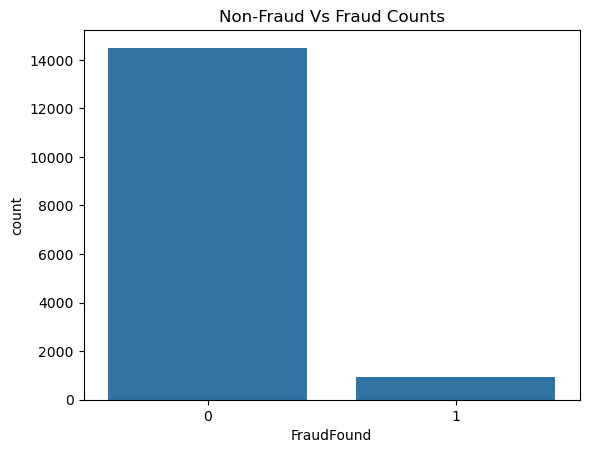

In [40]:
sns.countplot(x="FraudFound",data=data1)
plt.title("Non-Fraud Vs Fraud Counts")
plt.show()

#### from above graph we can observed  count of frauds 

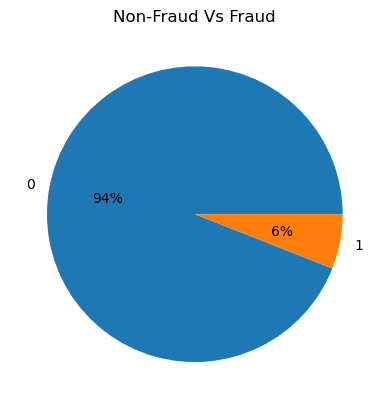

In [41]:
#create pie chart
plt.pie(data1.FraudFound.value_counts().values,labels=data1.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Non-Fraud Vs Fraud")
plt.show()

#### Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is imbalanced

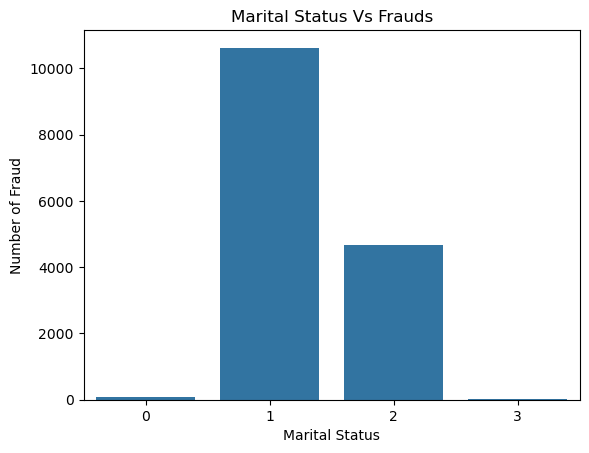

In [42]:
plt.title("Marital Status Vs Frauds")
sns.countplot(x="MaritalStatus",data=data1);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

#### from above graph we can see married are involved in more frauds

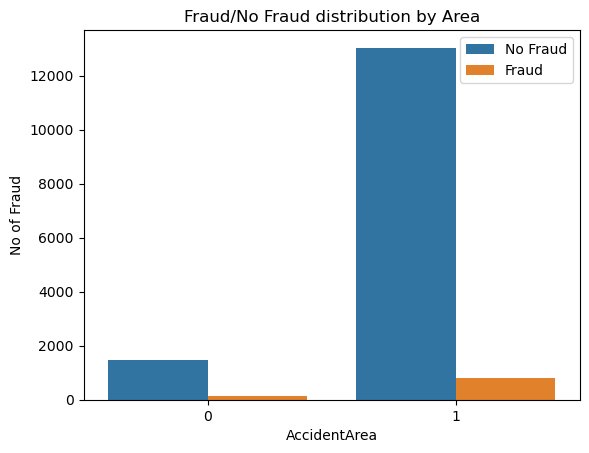

In [43]:
sns.countplot(x="AccidentArea", hue ='FraudFound', data=data1)
plt.title('Fraud/No Fraud distribution by Area')
plt.ylabel('No of Fraud')
labels = ["No Fraud", "Fraud"]
plt.legend(labels)
plt.show()

#### we can observed that Urban area experiences more frauds

<Axes: xlabel='Year', ylabel='count'>

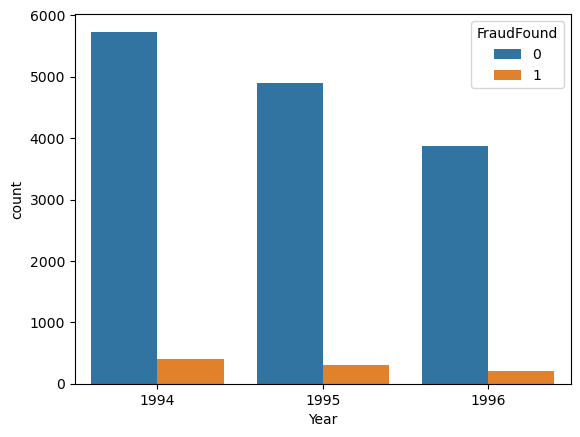

In [44]:
sns.countplot(x='Year', hue='FraudFound',data=data1 )

##### we can observe in year 1994 and 1995 there is more fraud as compared to 1996

<Axes: xlabel='AgentType', ylabel='count'>

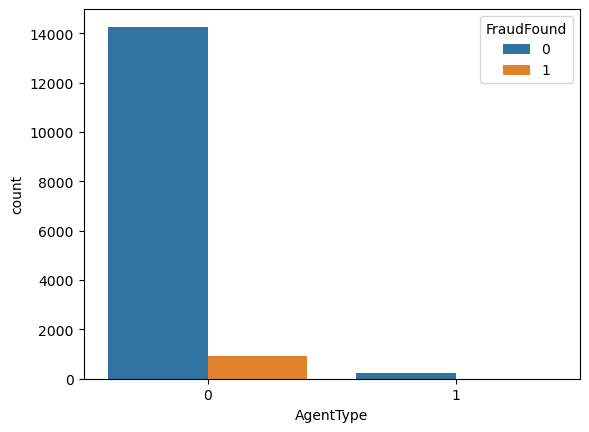

In [45]:
sns.countplot( x='AgentType', hue='FraudFound',data=data1)

#### we can observe external agents are involved in fraud 

<Axes: xlabel='VehicleCategory', ylabel='count'>

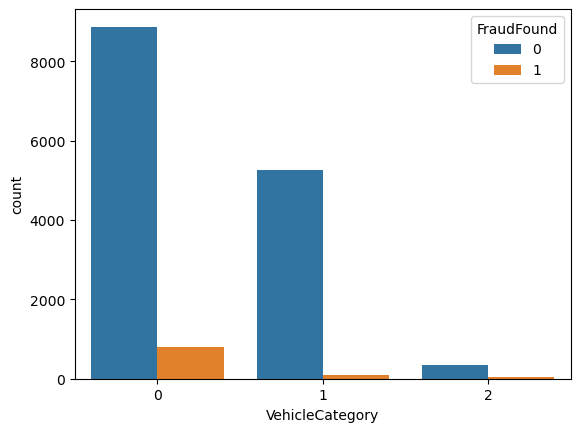

In [46]:
sns.countplot(x ='VehicleCategory',hue='FraudFound',data=data1)

#### from above observation we can see that sedan have most frauds

In [47]:
d1=data1.corr()

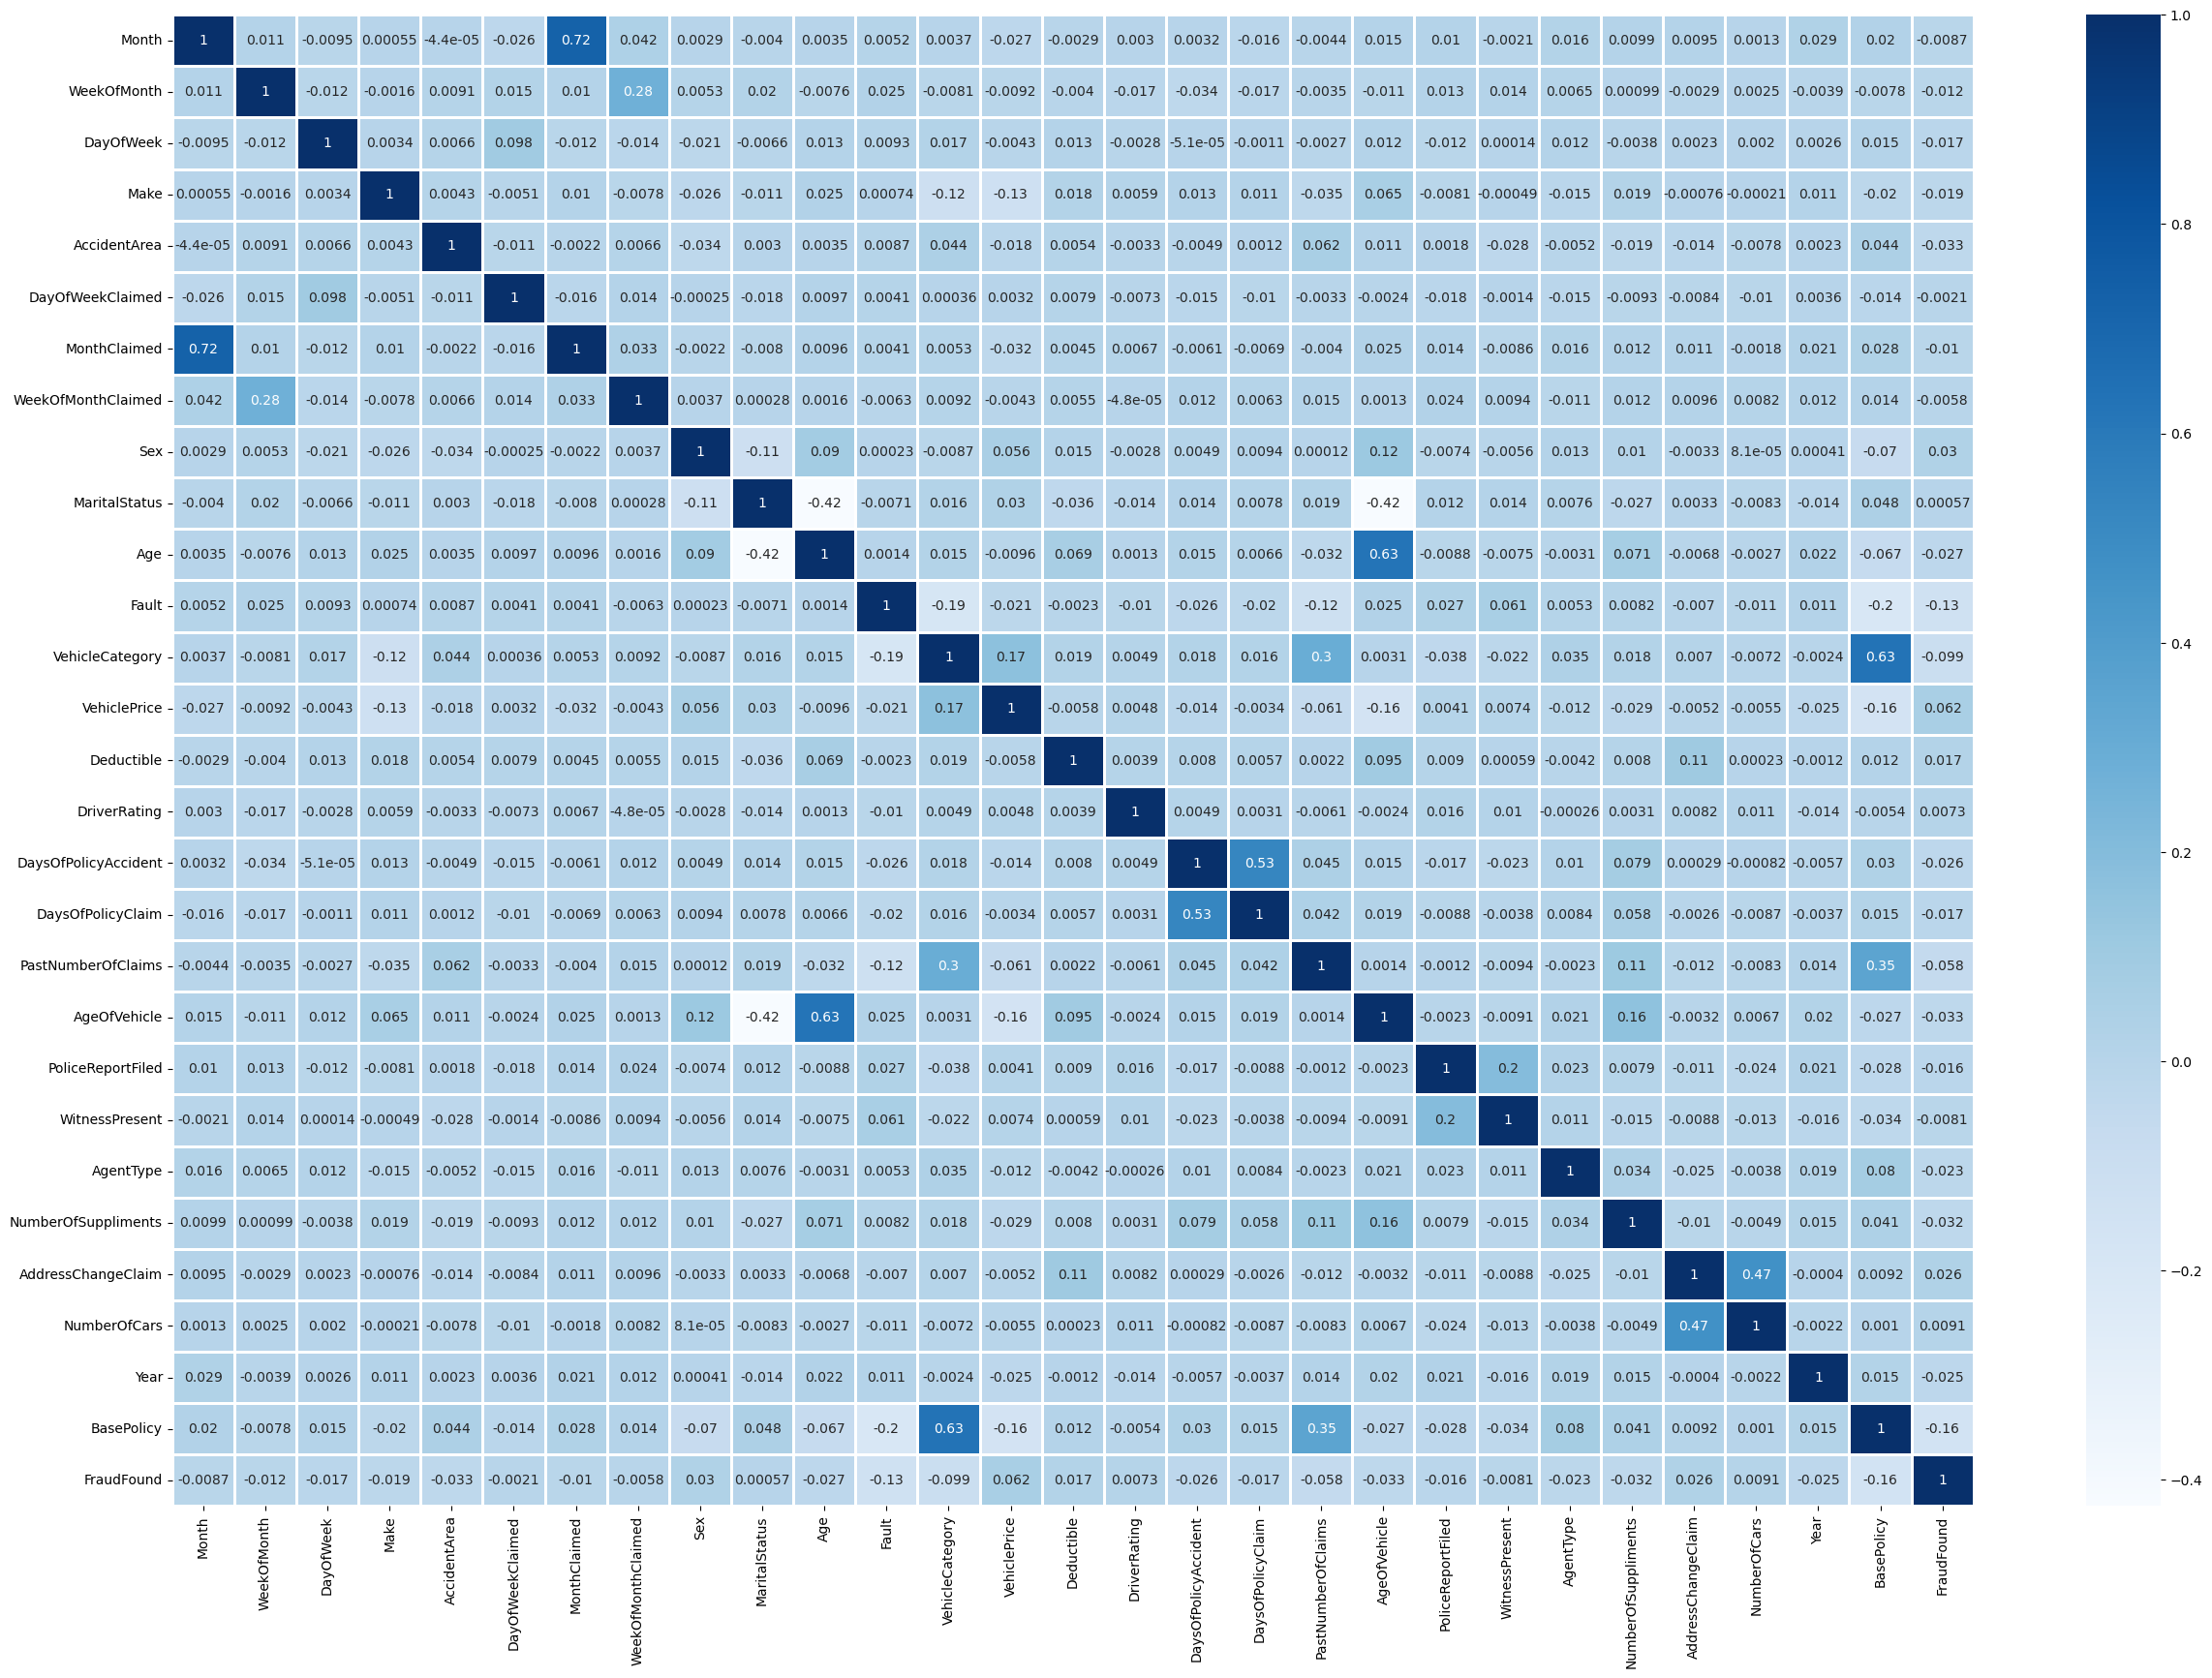

In [48]:
plt.figure(figsize=[30,20])
heatmap=sns.heatmap(d1,linewidth=1,annot=True,cmap=plt.cm.Blues)  

#### can observe the relationship between the columns 

In [49]:
data1.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int32
MonthClaimed              int32
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus             int32
Age                     float64
Fault                     int32
VehicleCategory           int32
VehiclePrice              int32
Deductible                int64
DriverRating              int64
DaysOfPolicyAccident      int64
DaysOfPolicyClaim         int64
PastNumberOfClaims        int64
AgeOfVehicle              int64
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int64
AddressChangeClaim        int64
NumberOfCars              int64
Year                      int64
BasePolicy                int32
FraudFound                int32
dtype: object

## Dividing data into train and test

In [50]:
x=data1.iloc[:,0:28]
y=data1.iloc[:,-1]

In [51]:
x.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,0,2,0,0,0,0,2,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,0,5,1,0,0,0,0,0,1994,1


In [52]:
y.head(2)

0    0
1    0
Name: FraudFound, dtype: int32

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12336, 28), (3084, 28), (12336,), (3084,))

# Logistic Regression

In [54]:
lg=LogisticRegression()

In [55]:
lg.fit(x_train,y_train)

LogisticRegression()

In [56]:
p1=lg.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
m1=confusion_matrix(p1,y_test)
m1

array([[2882,  202],
       [   0,    0]], dtype=int64)

In [59]:
TN, FP, FN, TP = m1.ravel()

In [60]:
l_p = TP / (TP + FP)
l_p

0.0

In [61]:
#l_r = TP / (TP + FN)
#l_r
l_r=0

In [62]:
#l_f1 = 2 * (l_p * l_r) / (l_p + l_r)
#l_f1
l_f1=0

In [63]:
acc=m1.diagonal().sum()/m1.sum()*100
acc #gives accuracy 

93.45006485084306

In [64]:
from sklearn.metrics import classification_report
print(classification_report(p1,y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3084
           1       0.00      0.00      0.00         0

    accuracy                           0.93      3084
   macro avg       0.50      0.47      0.48      3084
weighted avg       1.00      0.93      0.97      3084



# Decision Tree

In [65]:
dt=DecisionTreeClassifier()

In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
dp=dt.predict(x_test)

In [68]:
d_m=confusion_matrix(dp,y_test)
d_m

array([[2686,  143],
       [ 196,   59]], dtype=int64)

In [69]:
TN, FP, FN, TP = d_m.ravel()

In [70]:
d_p = TP / (TP + FP)
d_p

0.29207920792079206

In [71]:
d_r = TP / (TP + FN)
d_r

0.23137254901960785

In [72]:
d_f1 = 2 * (d_p * d_r) / (d_p + d_r)
d_f1

0.25820568927789933

In [73]:
d_acc=d_m.diagonal().sum()/d_m.sum()*100
d_acc #gives accuracy

89.00778210116731

In [74]:
print(classification_report(dp,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2829
           1       0.29      0.23      0.26       255

    accuracy                           0.89      3084
   macro avg       0.61      0.59      0.60      3084
weighted avg       0.88      0.89      0.88      3084



# Rndom Forest

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
rp=rf.predict(x_test)
#rp

In [78]:
p1=rf.predict_proba(x_test)

In [79]:
r_m=confusion_matrix(rp,y_test)
r_m

array([[2882,  199],
       [   0,    3]], dtype=int64)

In [80]:
TN, FP, FN, TP = r_m.ravel()

In [81]:
r_p = TP / (TP + FP)
r_p

0.01485148514851485

In [82]:
r_r = TP / (TP + FN)
r_r

1.0

In [83]:
r_f1 = 2 * (r_p * r_r) / (r_p + r_r)
r_f1

0.029268292682926828

In [84]:
r_acc=r_m.diagonal().sum()/r_m.sum()*100
r_acc

93.5473411154345

In [85]:
print(classification_report(rp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3081
           1       0.01      1.00      0.03         3

    accuracy                           0.94      3084
   macro avg       0.51      0.97      0.50      3084
weighted avg       1.00      0.94      0.97      3084



# AUC & ROC

In [86]:
roc=roc_auc_score(rp,y_test) #predicted ,actual value
roc

0.9677052904901007

In [87]:
df=pd.DataFrame(p1)

In [88]:
fpr,tpr,threshold =roc_curve(y_test,df.iloc[:,1])

In [89]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.46981263e-04,
       3.46981263e-04, 6.93962526e-04, 6.93962526e-04, 1.04094379e-03,
       1.73490632e-03, 2.42886884e-03, 2.77585010e-03, 3.46981263e-03,
       5.20471895e-03, 6.24566273e-03, 7.28660652e-03, 9.71547536e-03,
       9.71547536e-03, 1.14503817e-02, 1.28383067e-02, 1.56141568e-02,
       2.25537821e-02, 2.67175573e-02, 3.50451076e-02, 3.71269951e-02,
       4.16377516e-02, 4.92713393e-02, 6.21096461e-02, 7.49479528e-02,
       8.81332408e-02, 1.03400416e-01, 1.23872311e-01, 1.50242887e-01,
       1.74184594e-01, 1.99861207e-01, 2.22414990e-01, 2.51214434e-01,
       2.76544067e-01, 3.04649549e-01, 3.32061069e-01, 3.65024289e-01,
       3.95211659e-01, 4.21235253e-01, 4.53504511e-01, 5.14226232e-01,
       5.94378904e-01, 7.50867453e-01, 1.00000000e+00])

In [90]:
tpr

array([0.        , 0.0049505 , 0.01485149, 0.01980198, 0.02970297,
       0.03465347, 0.03960396, 0.04455446, 0.04455446, 0.04950495,
       0.04950495, 0.04950495, 0.05445545, 0.05940594, 0.05940594,
       0.08415842, 0.08910891, 0.10891089, 0.12871287, 0.13861386,
       0.15346535, 0.16831683, 0.18811881, 0.21782178, 0.23762376,
       0.26732673, 0.31188119, 0.35148515, 0.36633663, 0.39108911,
       0.44059406, 0.4950495 , 0.52970297, 0.5990099 , 0.66336634,
       0.71287129, 0.75247525, 0.79207921, 0.83663366, 0.87623762,
       0.92079208, 0.95544554, 0.97029703, 0.97029703, 0.97524752,
       0.98514851, 1.        ])

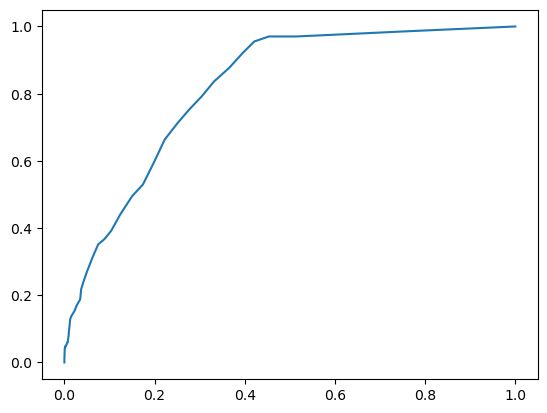

In [91]:
plt.plot(fpr,tpr)

# KNN

In [92]:
knn=KNeighborsClassifier(n_neighbors=10)

In [93]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [94]:
kp=knn.predict(x_test)

In [95]:

k_c=confusion_matrix(kp,y_test)
k_c

array([[2881,  201],
       [   1,    1]], dtype=int64)

In [96]:
TN, FP, FN, TP = k_c.ravel()

In [97]:
k_p = TP / (TP + FP)
k_p

0.0049504950495049506

In [98]:
k_r = TP / (TP + FN)
k_r
#k_r=0

0.5

In [99]:
k_f1 = 2 * (k_p * k_r) / (k_p + k_r)
k_f1
#k_f1=0

0.00980392156862745

In [100]:
k_acc=k_c.diagonal().sum()/k_c.sum()*100
k_acc

93.45006485084306

In [101]:
print(classification_report(kp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3082
           1       0.00      0.50      0.01         2

    accuracy                           0.93      3084
   macro avg       0.50      0.72      0.49      3084
weighted avg       1.00      0.93      0.97      3084



In [102]:
lst=list()

In [103]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(x_train,y_train)
#    knn_p=knn.predict(x_test)
#    c=confusion_matrix(knn_p,y_test)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst.append(acc)

In [104]:
#p=plt.plot(lst)

# SVM

In [105]:
svc=SVC()

In [106]:
svc.fit(x_train,y_train)

SVC()

In [107]:
sp=svc.predict(x_test)
#sp

In [108]:
sm=confusion_matrix(sp,y_test)
sm

array([[2882,  202],
       [   0,    0]], dtype=int64)

In [109]:
TN, FP, FN, TP = sm.ravel()

In [110]:
s_p = TP / (TP + FP)
s_p

0.0

In [111]:
#s_r = TP / (TP + FN)
#s_r
s_r=0

In [112]:
#s_f1 = 2 * (s_p * s_r) / (s_p + s_r)
#s_f1
s_f1=0

In [113]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

93.45006485084306

In [114]:
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      3084
           1       0.00      0.00      0.00         0

    accuracy                           0.93      3084
   macro avg       0.50      0.47      0.48      3084
weighted avg       1.00      0.93      0.97      3084



# Naive Bayes

In [115]:
nb=MultinomialNB()

In [116]:
nb.fit(x_train,y_train)

MultinomialNB()

In [117]:
np=nb.predict(x_test)

In [118]:
n_m=confusion_matrix(np,y_test)
n_m

array([[2847,  186],
       [  35,   16]], dtype=int64)

In [119]:
TN, FP, FN, TP = n_m.ravel()

In [120]:
n_p = TP / (TP + FP)
n_p

0.07920792079207921

In [121]:
n_r = TP / (TP + FN)
n_r

0.3137254901960784

In [122]:
n_f1 = 2 * (n_p * n_r) / (n_p +n_r)
n_f1

0.12648221343873517

In [123]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

92.83398184176394

In [124]:
print(classification_report(np,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3033
           1       0.08      0.31      0.13        51

    accuracy                           0.93      3084
   macro avg       0.53      0.63      0.54      3084
weighted avg       0.97      0.93      0.95      3084



# REPORT

In [125]:
list1=["logistic","DT","RF","KNN","SVM","NB"]
list2=[acc, d_acc, r_acc, k_acc, s_acc, n_acc]
list3=[l_p,  d_p,  r_p,  k_p,  s_p,  n_p  ]
list4=[l_r,  d_r,  r_r,  k_r,  s_r,  n_r  ]
list5=[l_f1, d_f1, r_f1, k_f1, s_f1, n_f1 ]

In [126]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,93.450065,0.000000,0.000000,0.000000
1,DT,89.007782,0.292079,0.231373,0.258206
2,RF,93.547341,0.014851,1.000000,0.029268
3,KNN,93.450065,0.004950,0.500000,0.009804
4,SVM,93.450065,0.000000,0.000000,0.000000
5,NB,92.833982,0.079208,0.313725,0.126482


In [127]:
# from above data frame we have 6 models out of which Random Foret is best fitted from other model
#because it has highest accuracy(93.547341	) and recall (1)

# Data Imbalance Treatment 

In [128]:
#oversampling
#data1.FraudFound.value_counts()
#t_0,t_1=data1["FraudFound"].value_counts()
#t_0,t_1
#train_0=data1[data1["FraudFound"]==0]
#train_1=data1[data1["FraudFound"]==1]
#train_0.shape,train_1.shape

In [129]:
# random oversampling
#r_over_0=train_1.sample(t_0,replace=True)
#r_over_1=pd.concat([r_over_0,train_0],axis=0)
#r_over_1.shape
#r_over_1["FraudFound"].value_counts()
#x_1=r_over_1.iloc[:,0:28]
#x_1.head()
#y_1=r_over_1.iloc[:,-1]
#y_1.head()

# SMOTE

In [130]:
smote=SMOTE()

In [131]:
x_sm,y_sm=smote.fit_resample(x,y)

In [132]:
x_sm.shape,y_sm.shape

((28994, 28), (28994,))

In [133]:
y_sm.value_counts()

FraudFound
0    14497
1    14497
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

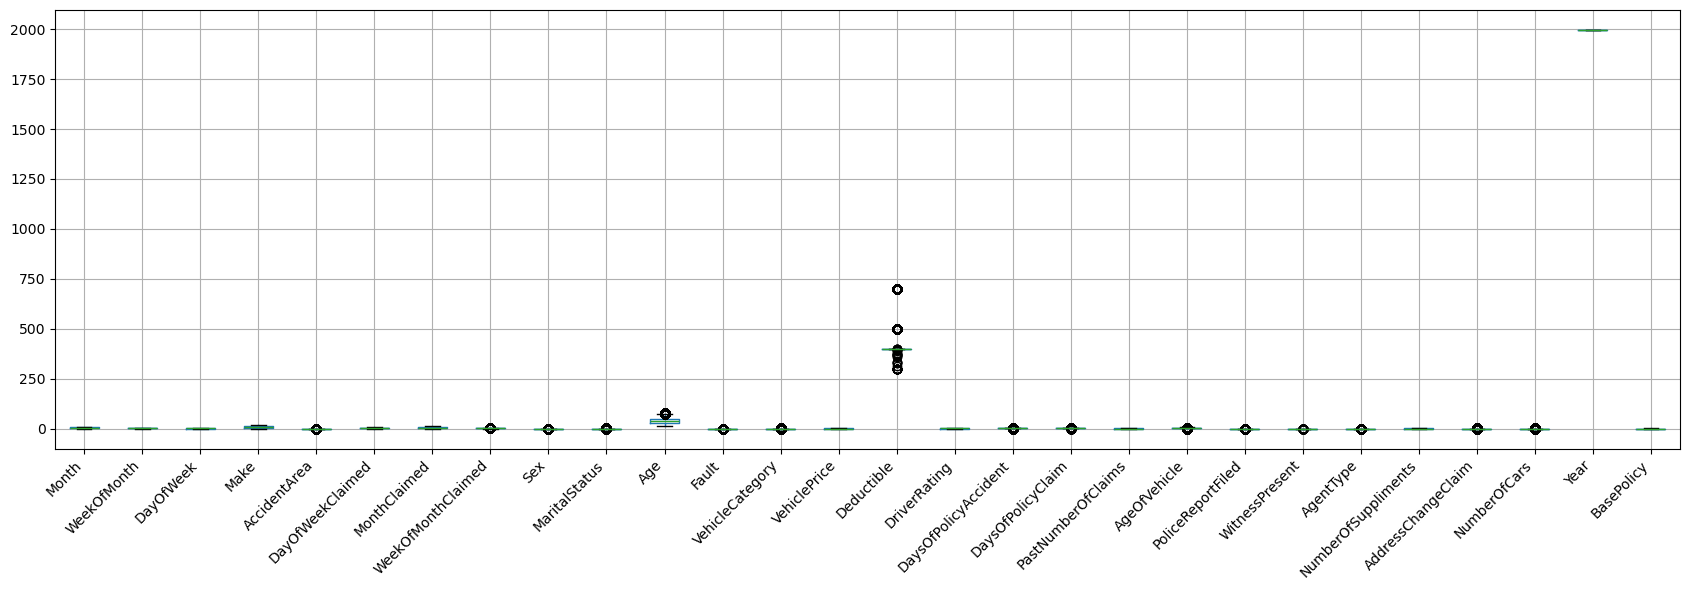

In [134]:
plt.figure(figsize=(17, 6))  
x_sm.boxplot()  # Your original boxplot code
plt.xticks(rotation=45, ha="right")  # Rotate the x-axis labels for better visibility
plt.tight_layout()  
plt.show

# Outlier Treatment 

(array([1600., 3893., 7523., 4902., 3980., 3252., 1712., 1377.,  377.,
         378.]),
 array([16. , 22.4, 28.8, 35.2, 41.6, 48. , 54.4, 60.8, 67.2, 73.6, 80. ]),
 <BarContainer object of 10 artists>)

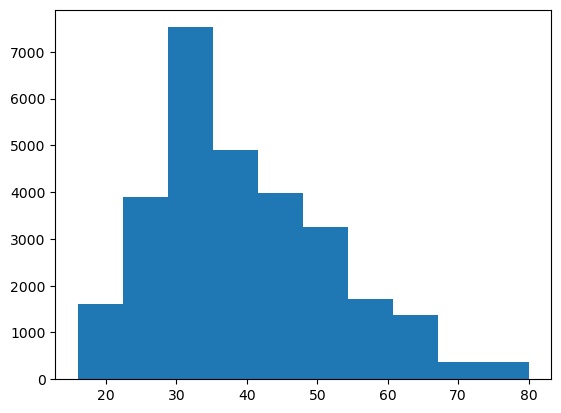

In [136]:
plt.hist(x_sm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

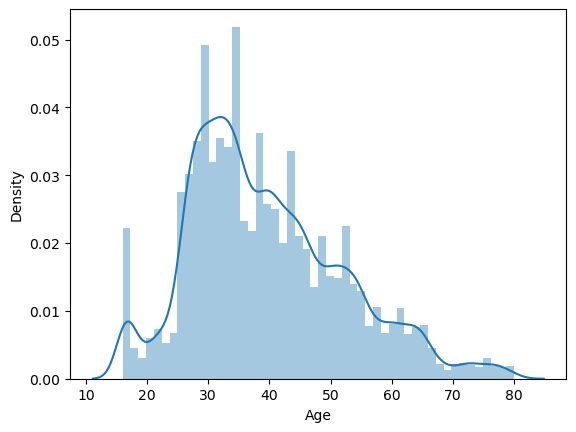

In [137]:
sns.distplot(x_sm["Age"])

In [138]:
x_sm["Age"].describe()

count    28994.000000
mean        39.573055
std         12.642446
min         16.000000
25%         30.000000
50%         37.050519
75%         47.000000
max         80.000000
Name: Age, dtype: float64

In [139]:
IQR=x_sm.Age.quantile(0.75)-x_sm.Age.quantile(0.25)
IQR

17.0

In [140]:
up1=x_sm.Age.quantile(0.75)+(3*IQR)
up1

98.0

In [141]:
x_sm.loc[x_sm["Age"]>98.0,"Age"]=98.0

(array([1600., 3893., 7523., 4902., 3980., 3252., 1712., 1377.,  377.,
         378.]),
 array([16. , 22.4, 28.8, 35.2, 41.6, 48. , 54.4, 60.8, 67.2, 73.6, 80. ]),
 <BarContainer object of 10 artists>)

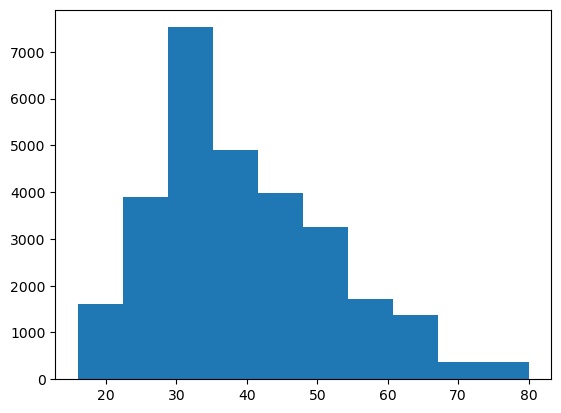

In [142]:
plt.hist(x_sm["Age"])

<Axes: xlabel='Age', ylabel='Density'>

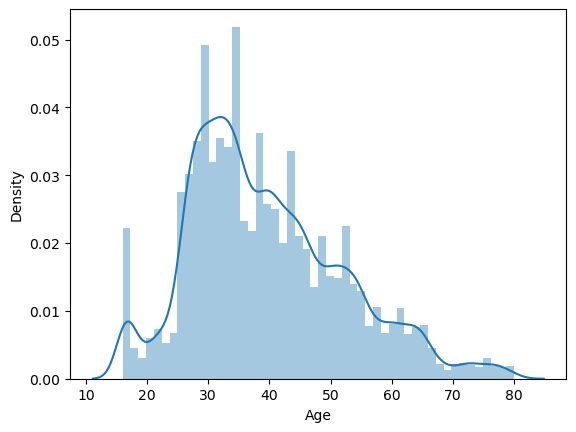

In [143]:
sns.distplot(x_sm["Age"])

# Skewness

In [144]:
x_sm.skew()

Month                    0.032267
WeekOfMonth              0.278235
DayOfWeek                0.183089
Make                    -0.178849
AccidentArea            -1.662574
DayOfWeekClaimed        -0.163095
MonthClaimed             0.003036
WeekOfMonthClaimed       0.273732
Sex                     -1.701037
MaritalStatus            1.132484
Age                      0.644501
Fault                    1.882546
VehicleCategory          1.676834
VehiclePrice             1.068963
Deductible               5.577169
DriverRating             0.151721
DaysOfPolicyAccident    -9.735226
DaysOfPolicyClaim      -11.977328
PastNumberOfClaims       0.335530
AgeOfVehicle            -1.758237
PoliceReportFiled        7.941502
WitnessPresent          18.174200
AgentType               10.831785
NumberOfSuppliments      0.751089
AddressChangeClaim       3.494108
NumberOfCars             5.086056
Year                     0.564458
BasePolicy               0.558219
dtype: float64

# Model Building

In [145]:
x_sm.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChangeClaim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,0,2,0,0,0,0,2,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,0,5,1,0,0,0,0,0,1994,1


In [146]:
y_sm.head(2)

0    0
1    0
Name: FraudFound, dtype: int32

In [147]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x_sm,y_sm,test_size=0.2,random_state=101)

In [148]:

x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((23195, 28), (5799, 28), (23195,), (5799,))

# Logistic Regression

In [149]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [150]:
lp1=lg.predict(x1_te)

In [151]:
lm1=confusion_matrix(lp1,y1_te)
lm1

array([[2132,  624],
       [ 743, 2300]], dtype=int64)

In [152]:
TN, FP, FN, TP = lm1.ravel()

In [153]:
l_p1 = TP / (TP + FP)
l_p1

0.786593707250342

In [154]:
l_r1 = TP / (TP + FN)
l_r1

0.7558330594807755

In [155]:
l_ff1 = 2 * (l_p1 * l_r1) / (l_p1 + l_r1)
l_ff1

0.7709066532595944

In [156]:
l_acc1=lm1.diagonal().sum()/lm1.sum()*100
l_acc1

76.42697016727021

In [157]:
print(classification_report(lp1,y1_te))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2756
           1       0.79      0.76      0.77      3043

    accuracy                           0.76      5799
   macro avg       0.76      0.76      0.76      5799
weighted avg       0.77      0.76      0.76      5799



# Decision Tree

In [158]:
dt=DecisionTreeClassifier()

In [159]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [160]:
dp1=dt.predict(x1_te)

In [161]:
d_m1=confusion_matrix(dp1,y1_te)
d_m1

array([[2552,  186],
       [ 323, 2738]], dtype=int64)

In [162]:
TN, FP, FN, TP = d_m1.ravel()

In [163]:
d_p1 = TP / (TP + FP)
d_p1

0.9363885088919288

In [164]:
d_r1 = TP / (TP + FN)
d_r1

0.8944789284547533

In [165]:
d_ff1 = 2 * (d_p1 * d_r1) / (d_p1 + d_r1)
d_ff1

0.9149540517961571

In [166]:
d_acc1=d_m1.diagonal().sum()/d_m1.sum()*100
d_acc1

91.22262459044663

In [167]:
print(classification_report(dp1,y1_te))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2738
           1       0.94      0.89      0.91      3061

    accuracy                           0.91      5799
   macro avg       0.91      0.91      0.91      5799
weighted avg       0.91      0.91      0.91      5799



# Rndom Forest

In [168]:
rf=RandomForestClassifier()

In [169]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [170]:
rp1=rf.predict(x1_te)

In [171]:
r_m1=confusion_matrix(rp1,y1_te)
r_m1

array([[2688,   96],
       [ 187, 2828]], dtype=int64)

In [172]:
TN, FP, FN, TP = r_m1.ravel()

In [173]:
r_p1 = TP / (TP + FP)
r_p1

0.9671682626538988

In [174]:
r_r1 = TP / (TP + FN)
r_r1

0.9379767827529022

In [175]:
r_ff1 = 2 * (r_p1 * r_r1) / (r_p1 + r_r1)
r_ff1

0.9523488802828758

In [176]:
r_acc1=r_m1.diagonal().sum()/r_m1.sum()*100
r_acc1

95.11984824969822

In [177]:
print(classification_report(rp1,y1_te))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2784
           1       0.97      0.94      0.95      3015

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



# precision recall

In [178]:
recall,precision,threshold=precision_recall_curve(y1_te,rp1)

In [179]:
precision

array([1.        , 0.96716826, 0.        ])

In [180]:
recall

array([0.50422487, 0.93797678, 1.        ])

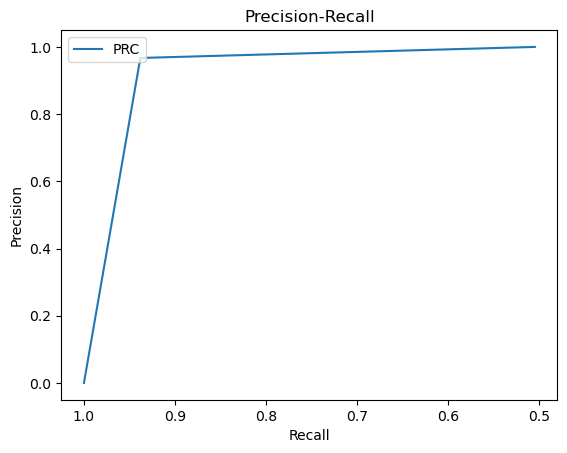

In [181]:
plt.plot(recall, precision, label="PRC") 
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")
plt.gca().invert_xaxis() 

# KNN

In [182]:
knn= KNeighborsClassifier(n_neighbors=40)

In [183]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=40)

In [184]:
kp1=knn.predict(x1_te)

In [185]:
k_c1=confusion_matrix(kp1,y1_te)
k_c1

array([[1666,   64],
       [1209, 2860]], dtype=int64)

In [186]:
TN, FP, FN, TP = k_c1.ravel()

In [187]:
k_p1 = TP / (TP + FP)
k_p1

0.9781121751025992

In [188]:
k_r1 = TP / (TP + FN)
k_r1

0.7028753993610224

In [189]:
k_ff1 = 2 * (k_p1 * k_r1) / (k_p1 + k_r1)
k_ff1

0.817960817960818

In [190]:
k_acc1=k_c1.diagonal().sum()/k_c1.sum()*100
k_acc1

78.04793929987929

In [191]:
print(classification_report(kp1,y1_te))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72      1730
           1       0.98      0.70      0.82      4069

    accuracy                           0.78      5799
   macro avg       0.78      0.83      0.77      5799
weighted avg       0.86      0.78      0.79      5799



In [192]:
lst1=list()

In [193]:
#for i in range(1,60):
#    knn=KNeighborsClassifier(n_neighbors=i)
#    knn.fit(x1_tr,y1_tr)
#    knn_p=knn.predict(x1_te)
#    c=confusion_matrix(knn_p,y1_te)
#    acc=c.diagonal().sum()/c.sum()*100
#    lst1.append(acc)

In [194]:
#p1=plt.plot(lst1)

# SVM

In [195]:
svc=SVC()

In [196]:
svc.fit(x1_tr,y1_tr)

SVC()

In [197]:
sp1=svc.predict(x1_te)

In [198]:
sm1=confusion_matrix(sp1,y1_te)
sm1

array([[2821, 2861],
       [  54,   63]], dtype=int64)

In [199]:
TN, FP, FN, TP = sm1.ravel()

In [200]:
s_p1 = TP / (TP + FP)
s_p1

0.021545827633378933

In [201]:
s_r1 = TP / (TP + FN)
s_r1

0.5384615384615384

In [202]:
s_ff1 = 2 * (s_p1 * s_r1) / (s_p1 + s_r1)
s_ff1

0.04143373890167708

In [203]:
s_acc1=sm1.diagonal().sum()/sm1.sum()*100
s_acc1

49.73271253664425

In [204]:
print(classification_report(sp1,y1_te))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      5682
           1       0.02      0.54      0.04       117

    accuracy                           0.50      5799
   macro avg       0.50      0.52      0.35      5799
weighted avg       0.96      0.50      0.65      5799



# Naive Bayes

In [205]:
nb=MultinomialNB()

In [206]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [207]:
np1=nb.predict(x1_te)

In [208]:
nb_m1=confusion_matrix(np1,y1_te)
nb_m1

array([[2218,  534],
       [ 657, 2390]], dtype=int64)

In [209]:
TN, FP, FN, TP = nb_m1.ravel()

In [210]:
n_p1 = TP / (TP + FP)
n_p1

0.8173734610123119

In [211]:
n_r1 = TP / (TP + FN)
n_r1

0.7843780767968493

In [212]:
n_ff1 = 2 * (n_p1 * n_r1) / (n_p1 +n_r1)
n_ff1

0.8005359236308824

In [213]:
n_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
n_acc1

79.46197620279358

In [214]:
print(classification_report(np1,y1_te))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2752
           1       0.82      0.78      0.80      3047

    accuracy                           0.79      5799
   macro avg       0.79      0.80      0.79      5799
weighted avg       0.80      0.79      0.79      5799



# XG Boost

In [215]:
xgb=XGBClassifier()

In [216]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [217]:
xgb_p=xgb.predict(x1_te)

In [218]:
xgb_m=confusion_matrix(xgb_p,y1_te)
xgb_m

array([[2694,  109],
       [ 181, 2815]], dtype=int64)

In [219]:
TN, FP, FN, TP = xgb_m.ravel()

In [220]:
xgb_p1 = TP / (TP + FP)
xgb_p1

0.9627222982216143

In [221]:
xgb_r1 = TP / (TP + FN)
xgb_r1

0.9395861148197597

In [222]:
xgb_f1 = 2 * (xgb_p1 * xgb_r1) / (xgb_p1 +xgb_r1)
xgb_f1

0.9510135135135135

In [223]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

94.99913778237628

In [224]:
print(classification_report(xgb_p,y1_te))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2803
           1       0.96      0.94      0.95      2996

    accuracy                           0.95      5799
   macro avg       0.95      0.95      0.95      5799
weighted avg       0.95      0.95      0.95      5799



# REPORT

In [225]:
list1=["logistic","DT","RF","KNN","SVM","NB"]
list2=[l_acc1, d_acc1, r_acc1, k_acc1, s_acc1, n_acc1]
list3=[l_p1,  d_p1,  r_p1,  k_p1,  s_p1,  n_p1  ]
list4=[l_r1,  d_r1,  r_r1,  k_r1,  s_r1,  n_r1  ]
list5=[l_ff1, d_ff1, r_ff1, k_ff1, s_ff1, n_ff1 ]

In [226]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1-score":list5})
result

,model_name,Accuracy,Precision,Recall,F1-score
0,logistic,76.426970,0.786594,0.755833,0.770907
1,DT,91.222625,0.936389,0.894479,0.914954
2,RF,95.119848,0.967168,0.937977,0.952349
3,KNN,78.047939,0.978112,0.702875,0.817961
4,SVM,49.732713,0.021546,0.538462,0.041434
5,NB,79.461976,0.817373,0.784378,0.800536


In [227]:
# from above dataframe we have 6 models out of which  random forest are best fitted from other models
#because this model  having higher accurancy ,f1 score and recall.

# Feature Engineering 

### RFE(Recursive feature elimination)

In [228]:
rfe=RFE(rf)

In [229]:
rfe.fit(x_sm,y_sm)

RFE(estimator=RandomForestClassifier())

In [230]:
rfe.support_ 

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True])

In [231]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,False
8,False
9,False


In [232]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(x_sm.iloc[:,0:28])})
pdf4

,feature_score,columns
0,True,Month
1,True,WeekOfMonth
2,True,DayOfWeek
3,True,Make
4,False,AccidentArea
5,True,DayOfWeekClaimed
6,True,MonthClaimed
7,False,WeekOfMonthClaimed
8,False,Sex
9,False,MaritalStatus


In [233]:
unwanted_columns =["NumberOfCars","AddressChangeClaim","AgentType","WitnessPresent","PoliceReportFiled","AgeOfVehicle","DaysOfPolicyClaim","DaysOfPolicyAccident","Deductible","VehiclePrice","MaritalStatus","Sex","WeekOfMonthClaimed","AccidentArea"]
data2=x_sm.drop(unwanted_columns, axis=1)

In [234]:
data2.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,Age,Fault,VehicleCategory,DriverRating,PastNumberOfClaims,NumberOfSuppliments,Year,BasePolicy
0,2,5,6,6,6,5,21.0,0,1,1,0,0,1994,2
1,4,3,6,6,2,5,34.0,0,1,4,0,0,1994,1


In [235]:
x2=data2

y2=y_sm


In [236]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [237]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((23195, 14), (5799, 14), (23195,), (5799,))

In [238]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [239]:
rp2=rf.predict(x2_te)

In [240]:
r_m2=confusion_matrix(rp2,y2_te)
r_m2

array([[2627,  108],
       [ 248, 2816]], dtype=int64)

In [241]:
TN, FP, FN, TP = r_m2.ravel()

In [242]:
r_p2 = TP / (TP + FP)
r_p2

0.9630642954856361

In [243]:
r_r2 = TP / (TP + FN)
r_r2

0.9190600522193212

In [244]:
r2_ff1 = 2 * (r_p2 * r_r2) / (r_p2 + r_r2)
r2_ff1

0.9405477621910487

In [245]:
r_acc2=r_m2.diagonal().sum()/r_m2.sum()*100
r_acc2

93.86101051905501

In [246]:
print(classification_report(rp2,y2_te))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2735
           1       0.96      0.92      0.94      3064

    accuracy                           0.94      5799
   macro avg       0.94      0.94      0.94      5799
weighted avg       0.94      0.94      0.94      5799



# XG Boost

In [247]:
xgb=XGBClassifier()

In [248]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [249]:
xgb_p1=xgb.predict(x2_te)

In [250]:
xgb_m1=confusion_matrix(xgb_p1,y2_te)
xgb_m1

array([[2671,  125],
       [ 204, 2799]], dtype=int64)

In [251]:
TN, FP, FN, TP = xgb_m1.ravel()

In [252]:
xgb_p2 = TP / (TP + FP)
xgb_p2

0.957250341997264

In [253]:
xgb_r2 = TP / (TP + FN)
xgb_r2

0.932067932067932

In [254]:
xgb2_f1 = 2 * (xgb_p2 * xgb_r2) / (xgb_p2 +xgb_r2)
xgb2_f1

0.9444913109498903

In [255]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

94.32660803586825

print(classification_report(xgb_p1,y2_te))

# precision recall Curve

In [256]:
precision,recall,threshold=precision_recall_curve(y2_te,xgb_p1)

In [257]:
#precision

In [258]:
#recall

Text(0.5, 1.0, 'Presion-Recall')

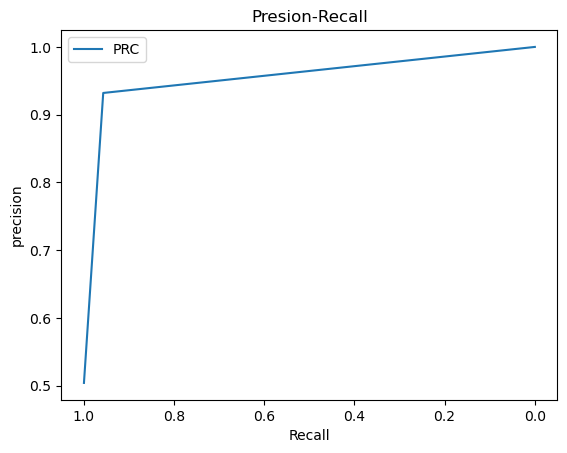

In [259]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("Recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.gca().invert_xaxis()
plt.title("Presion-Recall")

In [260]:
lst1=["RANDOM FOREST","RANDOM FOREST(RFE)","XGBOOST"]
lst2=[r_acc1,r_acc2,xgb_acc1]
lst3=[r_p1,r_p2,xgb_p2]
lst4=[r_r1,r_r2,xgb_r2]
lst5=[r_ff1,r2_ff1, xgb2_f1]

# Result 

In [261]:
result2=pd.DataFrame({"model_name":lst1,"Accuracy":lst2,"Precision":lst3,"Recall":lst4,"F1-score":lst5})
result2

,model_name,Accuracy,Precision,Recall,F1-score
0,RANDOM FOREST,95.119848,0.967168,0.937977,0.952349
1,RANDOM FOREST(RFE),93.861011,0.963064,0.919060,0.940548
2,XGBOOST,94.326608,0.957250,0.932068,0.944491


In [262]:
# Random Forest model, which demonstrated strong performance with good accuracy, F1 scor, and recall. However, the model showed signs of overfitting
# so i apply feature selection using RFE, After reducing the columns, the accuracy improved to 93.98. Then i applied the XGBoost algorithm on
# which resulted in an additional boost in accuracy(94.58%),F1 score, and recall .It indicating that the xgboost techniques enhance model performance.

# Model validation

In [ ]:
score1 = cross_val_score(rf, x2, y2, cv=5)

In [ ]:
print(f"Cross-validation scores: {score1}")
print(f"Mean CV accuracy: {score1.mean():.2f}")

# StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
score2 = cross_val_score(rf,x2,y2, cv=skf)

In [ ]:
print(f"Stratified CV accuracy: {score2.mean():.2f}")

In [ ]:
print(f"Standard deviation of CV scores: {score2.std():.2f}")

In [ ]:
# The StratifiedKFold method shows a mean accuracy of  0.92 indicating strong predictive performance across different data split.
# It minimizing the risk of overfitting.
